In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

4 classes

In [ ]:
# Flatten the label arrays
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Define selected class labels (airplane=0, automobile=1, bird=2, cat=3)
selected_classes = [0, 1, 2, 3]

# Create boolean masks to select only the desired classes
train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

# Apply the masks to filter images and labels
X_train_filtered = X_train[train_mask]
y_train_filtered = y_train[train_mask]
X_test_filtered = X_test[test_mask]
y_test_filtered = y_test[test_mask]

# Normalize the image pixel values to [0, 1]
X_train_filtered = X_train_filtered / 255.0
X_test_filtered = X_test_filtered / 255.0

# One-hot encode the labels with num_classes=4 (since we have 4 classes)
y_train_oh = to_categorical(y_train_filtered, num_classes=4)
y_test_oh = to_categorical(y_test_filtered, num_classes=4)

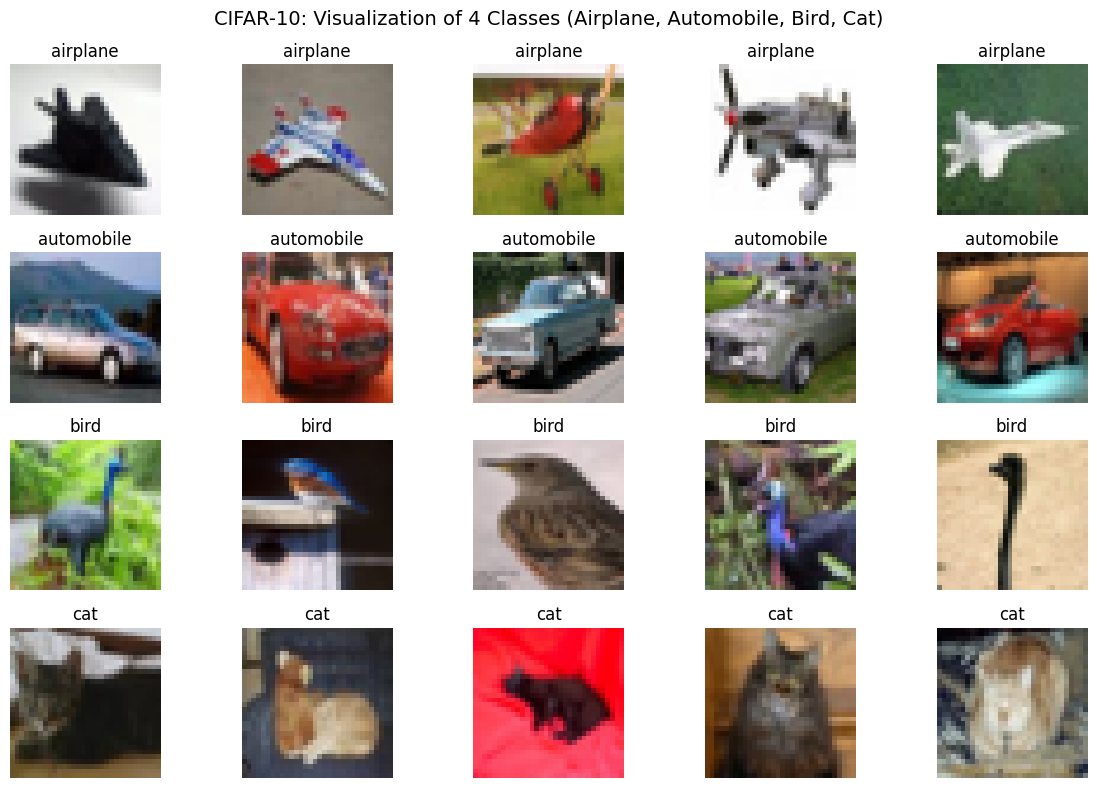

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat']
selected_classes = [0, 1, 2, 3]

plt.figure(figsize=(12, 8))

# Plot 5 images for each of the 4 selected classes
for class_index, class_label in enumerate(selected_classes):
    # Find the indices of images that belong to the current class
    indices = np.where(y_train_filtered == class_label)[0]
    # Plot 5 images for this class
    for i in range(5):
        plt.subplot(4, 5, class_index * 5 + i + 1)
        plt.imshow(X_train_filtered[indices[i]])
        plt.title(class_names[class_index])
        plt.axis('off')

plt.suptitle("CIFAR-10: Visualization of 4 Classes (Airplane, Automobile, Bird, Cat)", fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),          # Input layer (Flatten the images)

    Dense(256, activation='relu'),              # First hidden layer
    Dense(128, activation='relu'),              # Second hidden layer

    Dense(64, activation='relu'),                #3rd hidden layer
    Dense(32, activation = 'relu'),              # 4th hidden layer

    Dense(4, activation='softmax')             # Output layer (4 classes)
])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830,052 (3.17 MB)

 Trainable params: 830,052 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [16]:
model.fit(X_train_filtered, y_train_oh, epochs=4, batch_size=64)

Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6799 - loss: 0.8111
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6842 - loss: 0.7830
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7036 - loss: 0.7515
Epoch 4/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7044 - loss: 0.7387


In [17]:
model.evaluate(X_test_filtered, y_test_oh)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7005 - loss: 0.7631


[0.7659086585044861, 0.6947500109672546]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


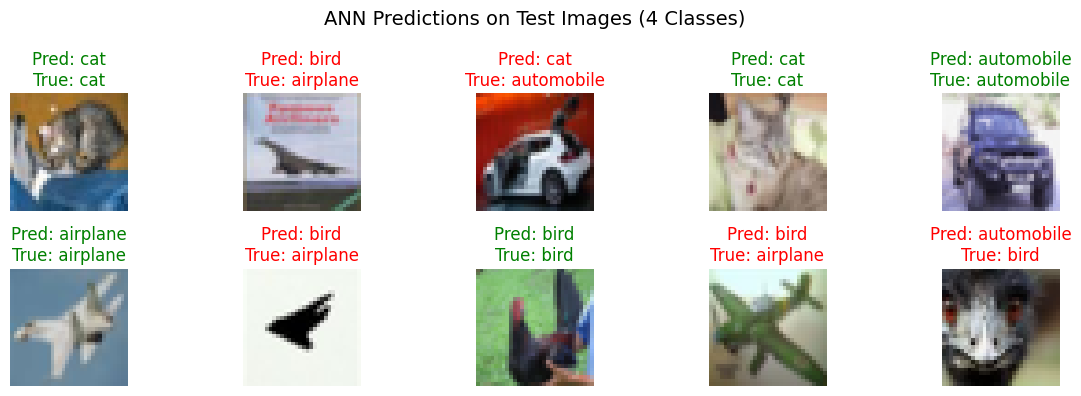

In [18]:
pred_probs = model.predict(X_test_filtered[:10])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_oh[:10], axis=1)

# Class labels for 4 selected classes
class_names = ['airplane', 'automobile', 'bird', 'cat']

# Plot predictions with colored titles
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_filtered[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color="green" if pred_classes[i] == true_classes[i] else "red")
    plt.axis('off')

plt.suptitle("ANN Predictions on Test Images (4 Classes)", fontsize=14)
plt.tight_layout()
plt.show()

8 classes

In [16]:
# Flatten the label arrays
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Define selected class labels (e.g., airplane=0 to horse=7)
selected_classes = [0, 1, 2, 3, 4, 5, 6, 7]

# Create boolean masks to select only the desired classes
train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

# Apply the masks to filter images and labels
X_train_filtered = X_train[train_mask]
y_train_filtered = y_train[train_mask]
X_test_filtered = X_test[test_mask]
y_test_filtered = y_test[test_mask]

# Normalize the image pixel values to [0, 1]
X_train_filtered = X_train_filtered / 255.0
X_test_filtered = X_test_filtered / 255.0

# One-hot encode the labels with num_classes=8 (since we have 8 classes)

y_train_oh = to_categorical(y_train_filtered, num_classes=8)
y_test_oh = to_categorical(y_test_filtered, num_classes=8)


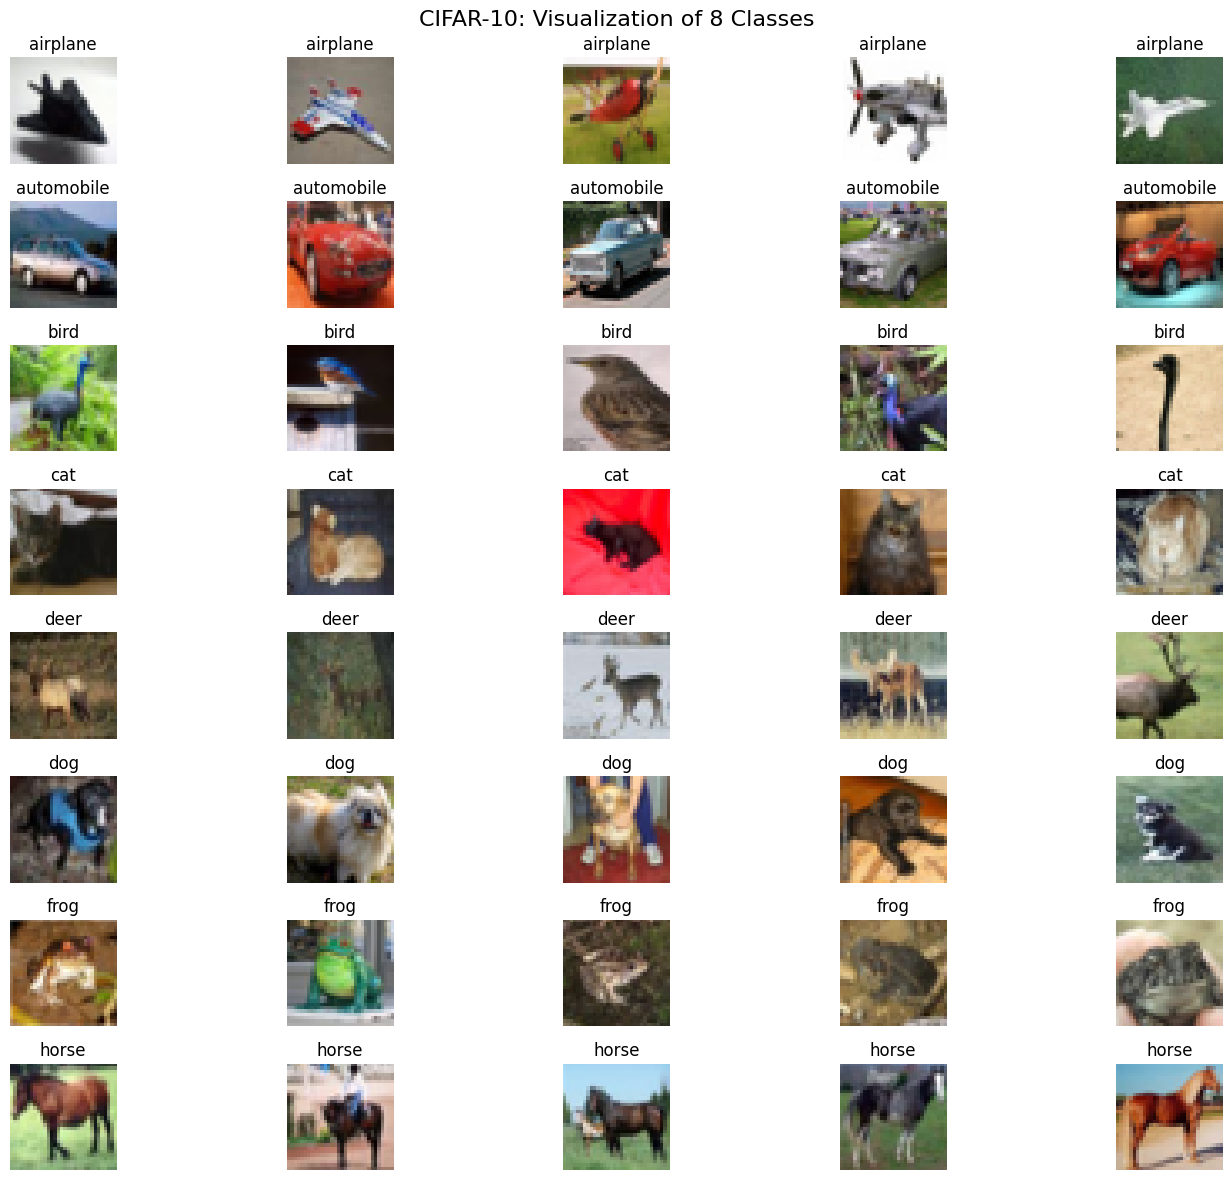

In [17]:

# Define 8 class names and corresponding indices
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse']
selected_classes = [0, 1, 2, 3, 4, 5, 6, 7]

plt.figure(figsize=(15, 12))

# Plot 5 images for each of the 8 selected classes
for class_index, class_label in enumerate(selected_classes):
    # Find the indices of images that belong to the current class
    indices = np.where(y_train_filtered == class_label)[0]
    # Plot 5 images for this class
    for i in range(5):
        plt.subplot(8, 5, class_index * 5 + i + 1)
        plt.imshow(X_train_filtered[indices[i]])
        plt.title(class_names[class_index])
        plt.axis('off')

plt.suptitle("CIFAR-10: Visualization of 8 Classes", fontsize=16)
plt.tight_layout()
plt.show()


In [39]:
model2 = Sequential([
    Flatten(input_shape=(32, 32, 3)),          # Input layer (Flatten the images)

    Dense(512, activation='relu'),              # First hidden layer
    Dense(256, activation='relu'),              # Second hidden layer

    Dense(128, activation='relu'),                #3rd hidden layer
    Dense(64, activation = 'relu'),              # 4th hidden layer

    Dense(8, activation='softmax')             # Output layer (8 classes)
])

In [40]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,746,376 (6.66 MB)

 Trainable params: 1,746,376 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model2.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [44]:
model2.fit(X_train_filtered, y_train_oh, epochs=4, batch_size=64)

Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4811 - loss: 1.4086
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4908 - loss: 1.3749
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5006 - loss: 1.3433
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5145 - loss: 1.3185


In [45]:
model2.evaluate(X_test_filtered, y_test_oh)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5051 - loss: 1.3605


[1.356148600578308, 0.5040000081062317]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


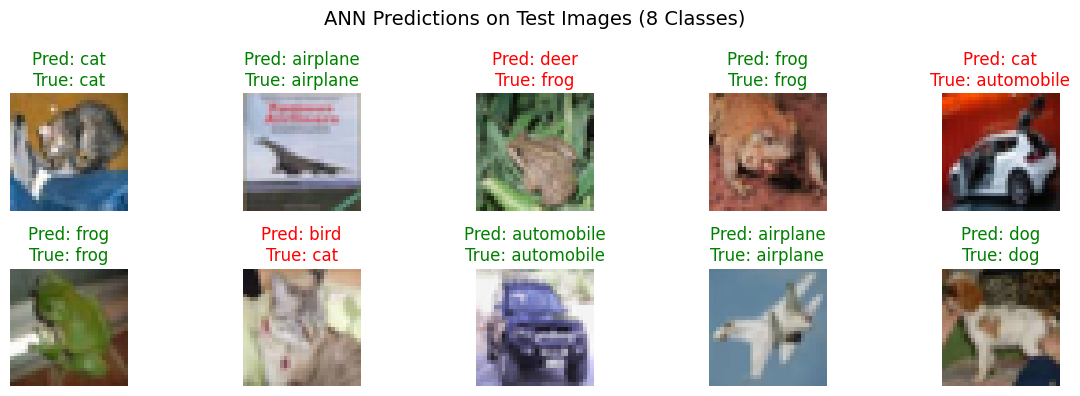

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on first 10 test images
pred_probs = model2.predict(X_test_filtered[:10])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_oh[:10], axis=1)

# Class labels for 8 selected classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse']

# Plot predictions with color-coded titles
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_filtered[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color="green" if pred_classes[i] == true_classes[i] else "red")
    plt.axis('off')

plt.suptitle("ANN Predictions on Test Images (8 Classes)", fontsize=14)
plt.tight_layout()
plt.show()


10 classes

In [27]:
X_train = X_train/255.0
X_test = X_test/255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

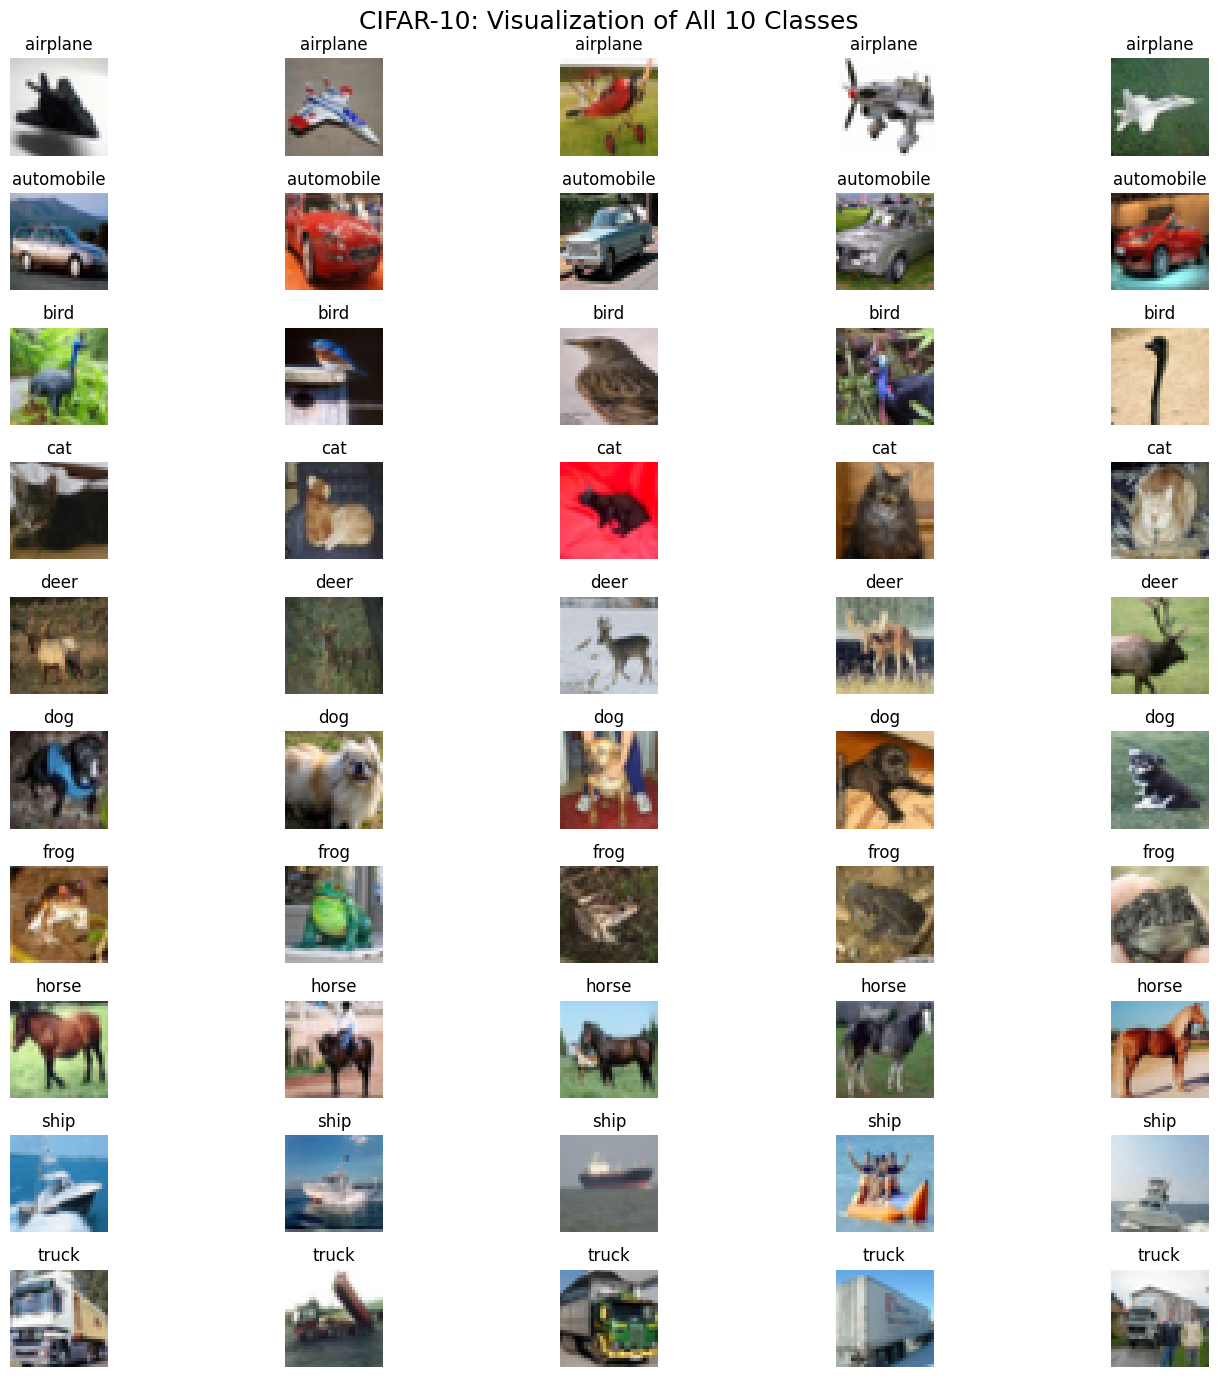

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
selected_classes = list(range(10))  # 0 to 9

plt.figure(figsize=(15, 14))

# Plot 5 images for each of the 10 selected classes
for class_index, class_label in enumerate(selected_classes):
    # Find indices where the true label (y_train) matches the current class
    indices = np.where(y_train == class_label)[0]
    for i in range(5):
        plt.subplot(10, 5, class_index * 5 + i + 1)
        plt.imshow(X_train[indices[i]])
        plt.title(class_names[class_index])
        plt.axis('off')

plt.suptitle("CIFAR-10: Visualization of All 10 Classes", fontsize=18)
plt.tight_layout()
plt.show()

In [39]:
model3 = Sequential([
    Flatten(input_shape=(32, 32, 3)),          # Input layer (Flatten the images)

    Dense(512, activation='relu'),              # First hidden layer
    Dense(256, activation='relu'),              # Second hidden layer

    Dense(256, activation='relu'),                #3rd hidden layer
    Dense(32, activation = 'relu'),              # 4th hidden layer

    Dense(10, activation='softmax')             # Output layer (10 classes)
])

In [40]:
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,779,050 (6.79 MB)

 Trainable params: 1,779,050 (6.79 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model3.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [42]:
model3.fit(X_train, y_train, epochs=4, batch_size=64)

Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2114 - loss: 2.0992
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3664 - loss: 1.7517
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4112 - loss: 1.6309
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4419 - loss: 1.5620


In [43]:
model3.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4459 - loss: 1.5294


[1.5367292165756226, 0.44920000433921814]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


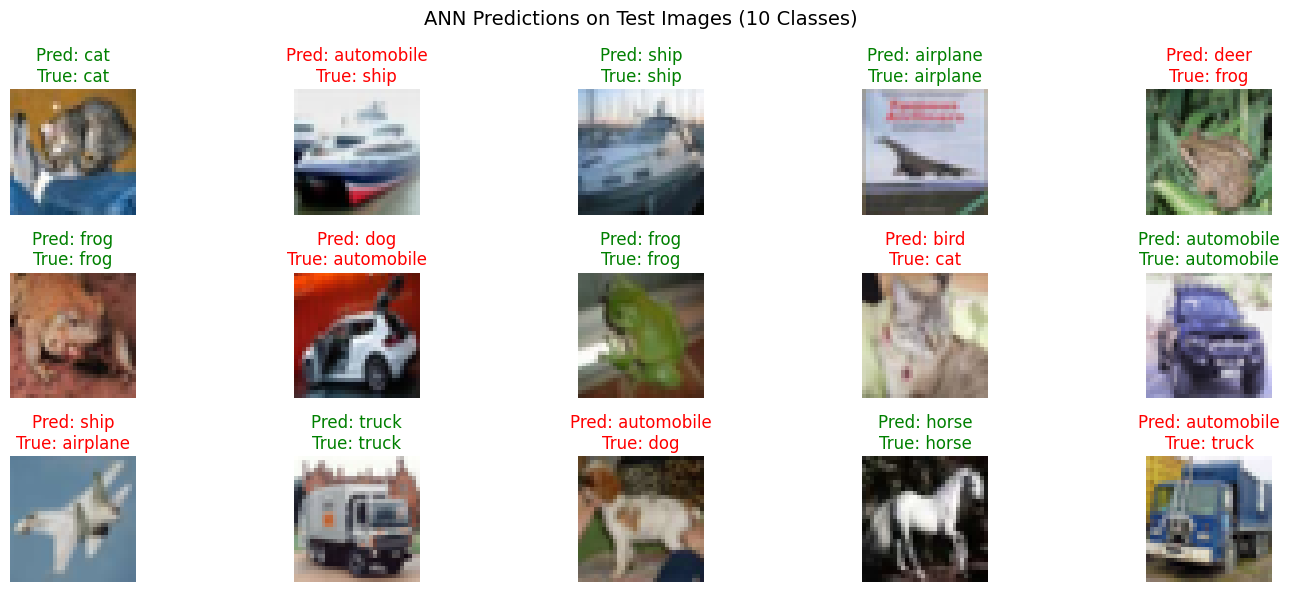

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on first 10 test images
pred_probs = model3.predict(X_test[:15])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test[:15], axis=1)

# Class labels for all 10 CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot predictions with color-coded titles
plt.figure(figsize=(15, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color="green" if pred_classes[i] == true_classes[i] else "red")
    plt.axis('off')

plt.suptitle("ANN Predictions on Test Images (10 Classes)", fontsize=14)
plt.tight_layout()
plt.show()
